In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import pickle
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from comparers import ModelComparer, plot_decision_boundary
from baseline import print_rules, plot_tree_leafs_for_class
from tasks.gaussian_quantiles import make_task

In [2]:
clf_a, clf_b, X, y, feature_names = make_task()

In [3]:
comparer = ModelComparer(clf_a, clf_b, feature_names)

# General Explanations

In [4]:
is_pred_diff = comparer.predict_bin_diff(X)
mclass_diff = comparer.predict_mclass_diff(X)
class_names = comparer.class_names
classes = comparer.classes

In [5]:
def explain(max_depth=None, tree_fig_size=(28, 14)):
    global tree
    tree = DecisionTreeClassifier(max_depth=max_depth)
    tree.fit(X, mclass_diff)
    
    feature_importances = tree.feature_importances_
    feature_order = np.flip(np.argsort(feature_importances))
    fig, ax = plt.subplots(figsize=(5, 2))
    ax.set_title('Relative feature importance')
    ax.scatter(np.flip(feature_importances[feature_order]),
               np.flip(comparer.feature_names[feature_order]))
    ax.set_xlim((-0.05, ax.get_xlim()[1]))
    plt.show()
    
    fig, ax = plt.subplots(figsize=(14, 14))
    plot_tree(tree, feature_names=feature_names, class_names=class_names, ax=ax, node_ids=True, precision=2)
    
    for focus_class in comparer.difference_class_names:
        print(focus_class)
        print_rules(tree, feature_names, class_names, focus_class, X_test=X, y_test=mclass_diff, precision=2)
    
    plot_tree_leafs_for_class(tree, class_names, comparer.difference_class_names, X, mclass_diff, class_names, feature_names)
        
    print('\ndata evaluation:')
    print(classification_report(mclass_diff, tree.predict(X), labels=classes, target_names=class_names))

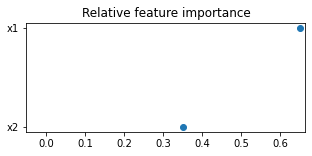

(0, 1)
(1, 0)
node #4: if (x2 > -127.17) and (x2 <= -124.56) then class (1, 0) (covers 0.667 of 3 instances)

data evaluation:
              precision    recall  f1-score   support

      (0, 0)       0.69      1.00      0.82       259
      (0, 1)       0.00      0.00      0.00         0
      (1, 0)       0.67      0.02      0.04       101
      (1, 1)       0.91      0.85      0.88       240

   micro avg       0.78      0.78      0.78       600
   macro avg       0.57      0.47      0.43       600
weighted avg       0.78      0.78      0.71       600



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


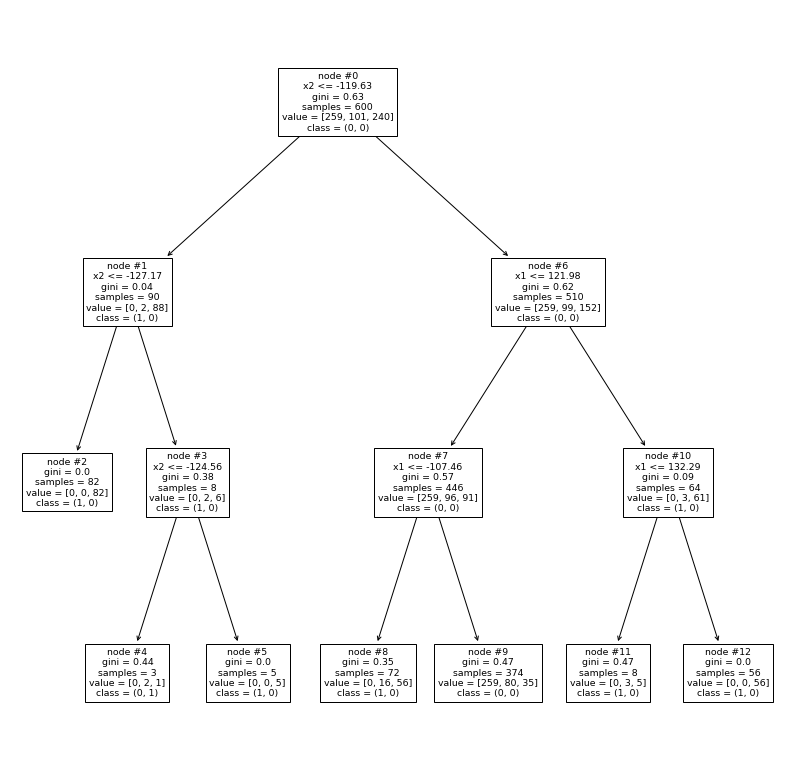

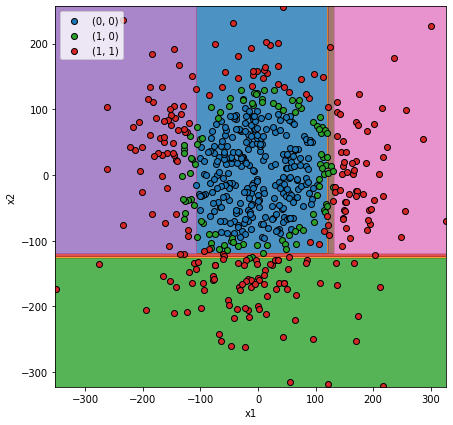

In [6]:
explain(max_depth=3)

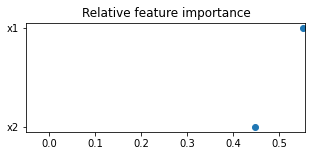

(0, 1)
(1, 0)
node #12: if (x1 > -132.91) and (x1 <= -107.46) and (x2 > -119.63) then class (1, 0) (covers 0.64 of 25 instances)
node #19: if (x1 > 126.05) and (x1 <= 132.29) and (x2 > -119.63) then class (1, 0) (covers 0.75 of 4 instances)
node #5: if (x1 <= 22.08) and (x2 > -127.17) and (x2 <= -124.56) then class (1, 0) (covers 1.0 of 2 instances)

data evaluation:
              precision    recall  f1-score   support

      (0, 0)       0.80      1.00      0.89       259
      (0, 1)       0.00      0.00      0.00         0
      (1, 0)       0.68      0.21      0.32       101
      (1, 1)       0.91      0.93      0.92       240

   micro avg       0.84      0.84      0.84       600
   macro avg       0.60      0.54      0.53       600
weighted avg       0.82      0.84      0.81       600



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


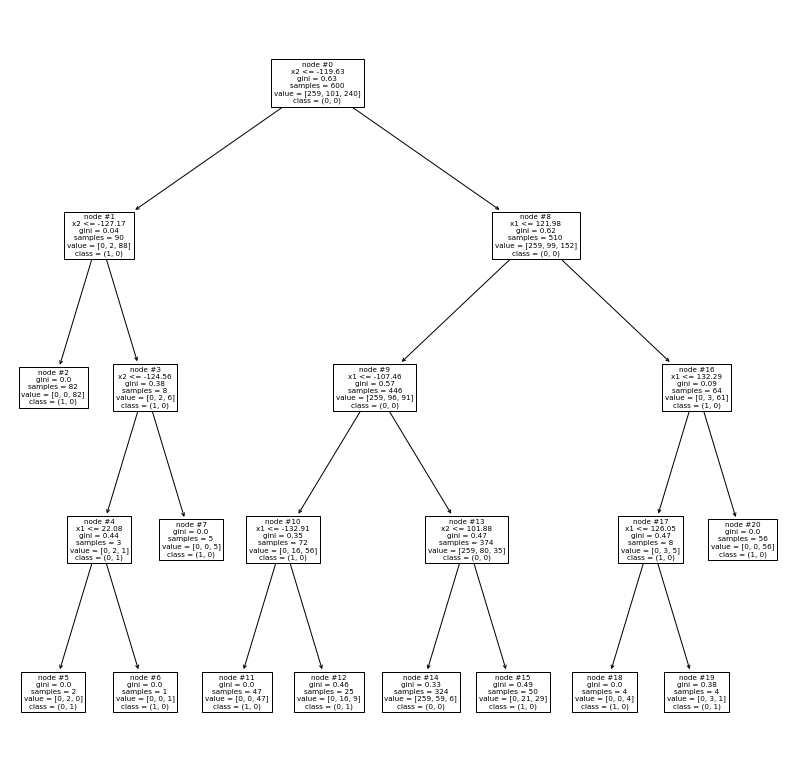

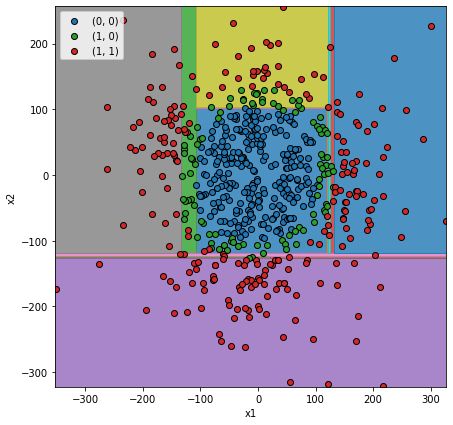

In [7]:
explain(max_depth=4)

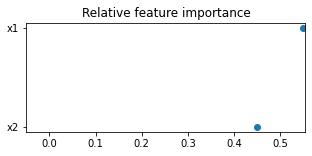

(0, 1)
(1, 0)
node #18: if (x1 > 95.09) and (x1 <= 121.98) and (x2 > -119.63) and (x2 <= 101.88) then class (1, 0) (covers 0.833 of 30 instances)
node #20: if (x1 > -107.46) and (x1 <= 121.98) and (x2 > 101.88) and (x2 <= 131.65) then class (1, 0) (covers 0.84 of 25 instances)
node #13: if (x1 > -132.91) and (x1 <= -107.46) and (x2 > -119.63) and (x2 <= 62.12) then class (1, 0) (covers 0.889 of 18 instances)
node #27: if (x1 > 126.05) and (x1 <= 132.29) and (x2 > -29.1) then class (1, 0) (covers 1.0 of 3 instances)
node #5: if (x1 <= 22.08) and (x2 > -127.17) and (x2 <= -124.56) then class (1, 0) (covers 1.0 of 2 instances)

data evaluation:
              precision    recall  f1-score   support

      (0, 0)       0.87      0.99      0.93       259
      (0, 1)       0.00      0.00      0.00         0
      (1, 0)       0.86      0.66      0.75       101
      (1, 1)       1.00      0.95      0.97       240

   micro avg       0.92      0.92      0.92       600
   macro avg       0.68 

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


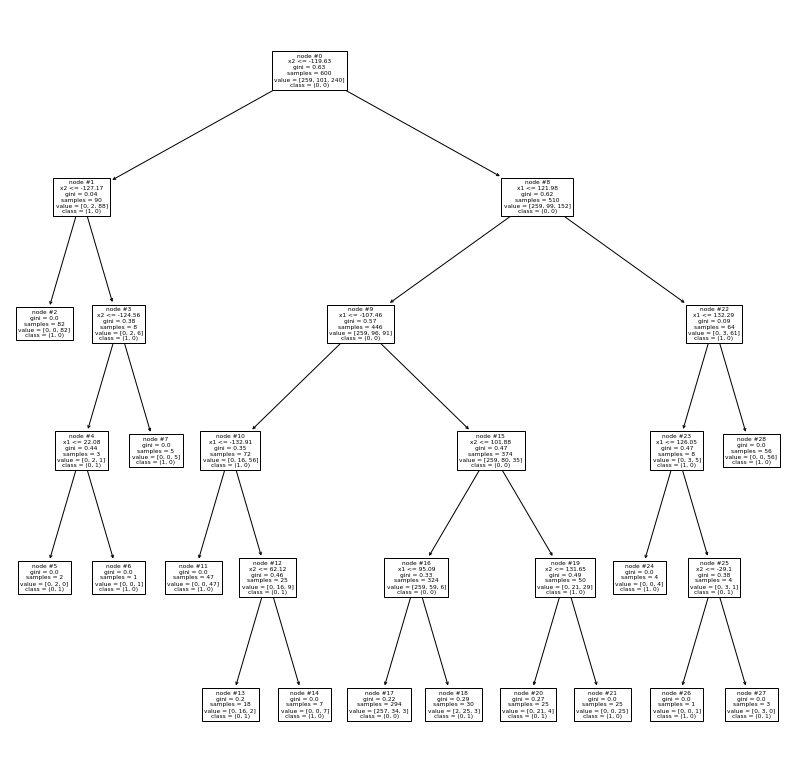

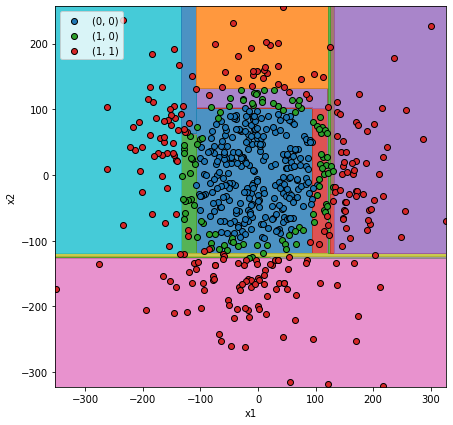

In [8]:
explain(max_depth=5)

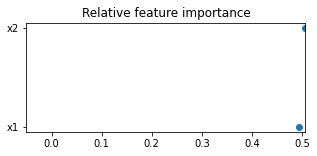

(0, 1)
(1, 0)
node #20: if (x1 > -107.46) and (x1 <= 95.09) and (x2 > -119.63) and (x2 <= -89.16) then class (1, 0) (covers 0.75 of 28 instances)
node #24: if (x1 > 95.09) and (x1 <= 121.98) and (x2 > -61.27) and (x2 <= 101.88) then class (1, 0) (covers 0.923 of 26 instances)
node #27: if (x1 > -107.46) and (x1 <= 78.65) and (x2 > 101.88) and (x2 <= 131.65) then class (1, 0) (covers 0.913 of 23 instances)
node #15: if (x1 > -132.91) and (x1 <= -107.46) and (x2 > -75.78) and (x2 <= 62.12) then class (1, 0) (covers 1.0 of 16 instances)
node #35: if (x1 > 126.05) and (x1 <= 132.29) and (x2 > -29.1) then class (1, 0) (covers 1.0 of 3 instances)
node #5: if (x1 <= 22.08) and (x2 > -127.17) and (x2 <= -124.56) then class (1, 0) (covers 1.0 of 2 instances)

data evaluation:
              precision    recall  f1-score   support

      (0, 0)       0.95      0.98      0.96       259
      (0, 1)       0.00      0.00      0.00         0
      (1, 0)       0.89      0.86      0.87       101
     

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


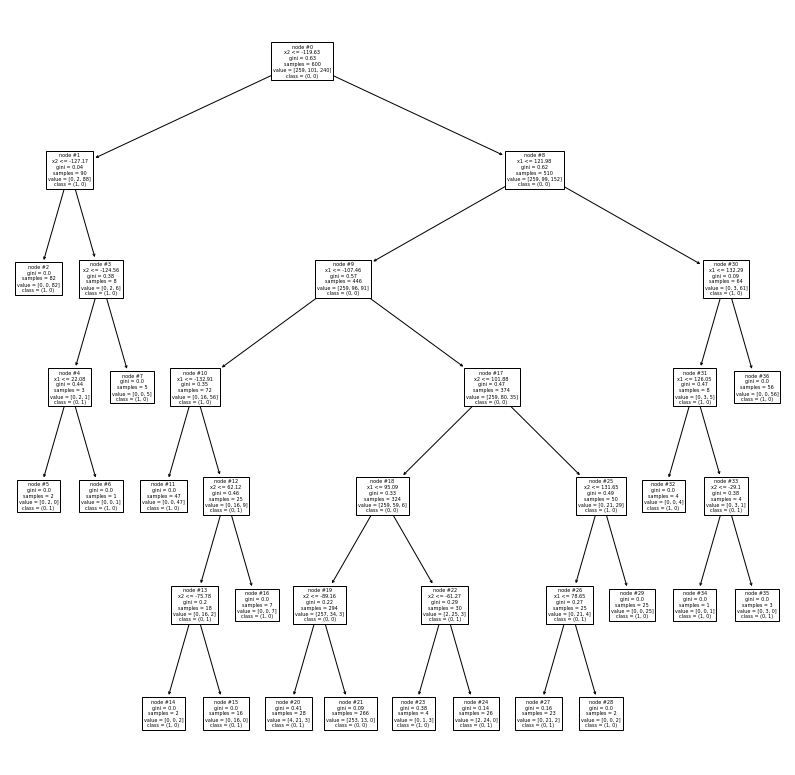

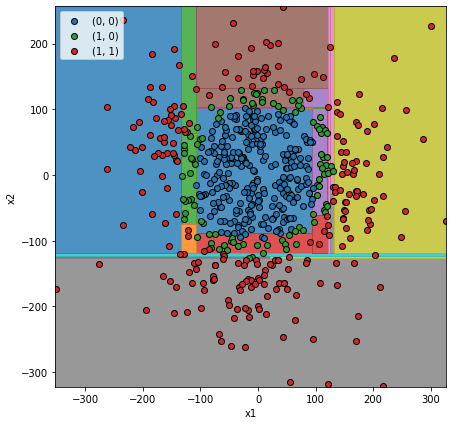

In [9]:
explain(max_depth=6)

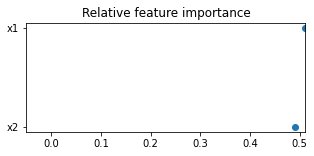

(0, 1)
(1, 0)
node #60: if (x1 > 101.92) and (x1 <= 121.98) and (x2 > -61.27) and (x2 <= 101.88) then class (1, 0) (covers 1.0 of 22 instances)
node #66: if (x1 > -83.22) and (x1 <= 78.65) and (x2 > 101.88) and (x2 <= 125.71) then class (1, 0) (covers 1.0 of 18 instances)
node #24: if (x1 > -82.84) and (x1 <= 78.52) and (x2 > -119.63) and (x2 <= -95.89) then class (1, 0) (covers 1.0 of 17 instances)
node #15: if (x1 > -132.91) and (x1 <= -107.46) and (x2 > -75.78) and (x2 <= 62.12) then class (1, 0) (covers 1.0 of 16 instances)
node #36: if (x1 > -107.46) and (x1 <= -95.62) and (x2 > 44.82) and (x2 <= 101.88) then class (1, 0) (covers 1.0 of 4 instances)
node #77: if (x1 > 126.05) and (x1 <= 132.29) and (x2 > -29.1) then class (1, 0) (covers 1.0 of 3 instances)
node #27: if (x1 > -107.46) and (x1 <= -52.91) and (x2 > -95.89) and (x2 <= -89.16) then class (1, 0) (covers 1.0 of 3 instances)
node #41: if (x1 > 60.86) and (x1 <= 95.09) and (x2 > -89.16) and (x2 <= -79.73) then class (1, 0)

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


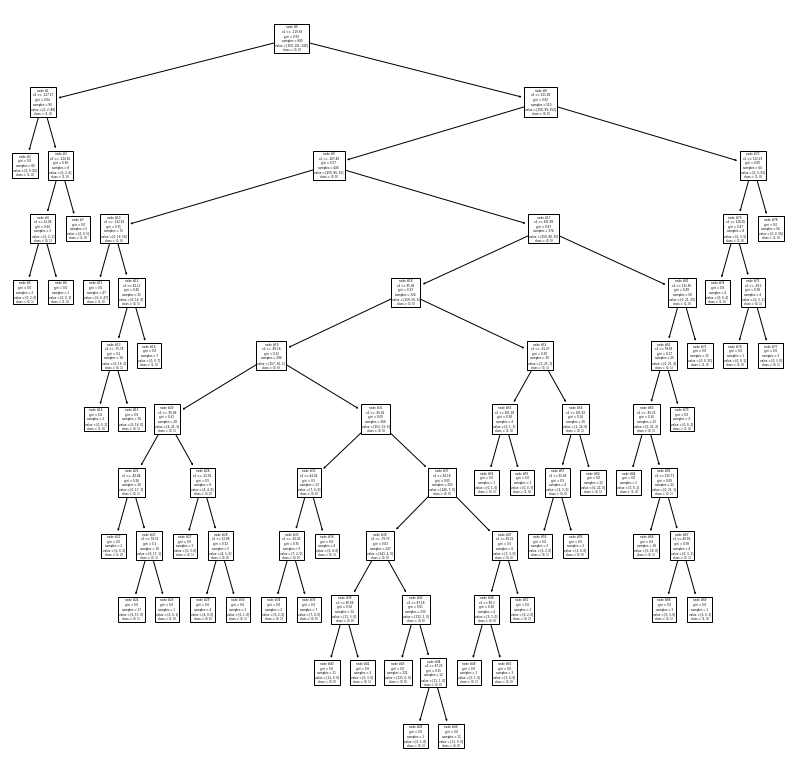

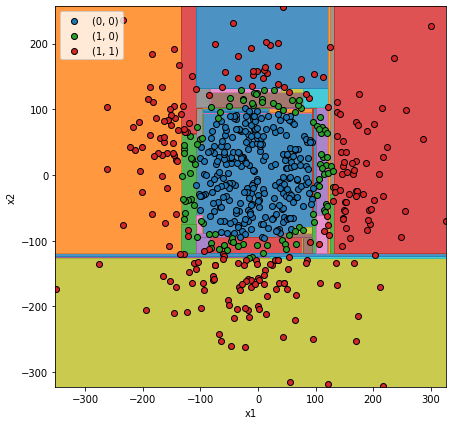

In [10]:
explain()